# Importing and Installing Libraries

In [1]:
# Update to the latest version of pip package manager in case of an older version
# python.exe -m pip install --upgrade pip

In [2]:
!pip --version

pip 23.3 from C:\Users\bhuva\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip (python 3.11)



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
import plotly.express as px

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [5]:
# If pd.read_excel doesn't work, run the following command to install an excel file reader
# !pip install openpyxl

In [6]:
# Turn off SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

In [7]:
# Ignore DepreciationWarning
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 

# # Ignore FutureWarning
warnings.simplefilter(action='ignore', category = FutureWarning)

--------------------------------

---------------

-----------------------

# Raw Data Extraction

## 2020 Placements data

In [8]:
df_2020_summary = pd.read_excel('2020-xlsx/2020 Placements.xlsx', 'Summary')
df_2020_summary.to_csv('2020-csv/2020 Placements - Summary.csv')

In [9]:
df_2020_stu_pl_rec = pd.read_excel('2020-xlsx/2020 Placements.xlsx', 'Student Placement Record')
df_2020_stu_pl_rec.to_csv('2020-csv/2020 Placements - Student Placement Record.csv')

----------------------------------

## 2021 Placements Data

In [10]:
df_2021_status = pd.read_excel('2021-xlsx/2021 Placements.xlsx', 'Status')
df_2021_status.to_csv('2021-csv/2021 Placements - Status.csv')

In [11]:
df_2021_stats = pd.read_excel('2021-xlsx/2021 Placements.xlsx', 'Statistics')
df_2021_stats.to_csv('2021-csv/2021 Placements - Statistics.csv')

In [12]:
df_2021_pl_reg = pd.read_excel('2021-xlsx/2021 Placements.xlsx', 'Placement Registrations')
df_2021_pl_reg.to_csv('2021-csv/2021 Placements - Placement Registrations.csv')

In [13]:
df_2021_nirf = pd.read_excel('2021-xlsx/2021 Placements.xlsx', 'Nirf Format')
df_2021_nirf.to_csv('2021-csv/2021 Placements - NIRF.csv')

In [14]:
df_2021_avg = pd.read_excel('2021-xlsx/2021 Placements.xlsx', 'Average')
df_2021_avg.to_csv('2021-csv/2021 Placements - Average.csv')

--------------------------------------

## 2022 Placements Data

In [15]:
df_2022_summary = pd.read_excel('2022-xlsx/2022 Placements.xlsx', 'Summary')
df_2022_summary.to_csv('2022-csv/2022 Placements - Summary.csv')

In [16]:
df_2022_nirf = pd.read_excel('2022-xlsx/2022 Placements.xlsx', 'Nirf')
df_2022_nirf.to_csv('2022-csv/2022 Placements - Nirf.csv')

In [17]:
df_2022_avg = pd.read_excel('2022-xlsx/2022 Placements.xlsx', 'Avg')
df_2022_avg.to_csv('2022-csv/2022 Placements - Average.csv')

In [18]:
df_2022_companies = pd.read_excel('2022-xlsx/2022 Placements.xlsx', 'Companies')
df_2022_companies.to_csv('2022-csv/2022 Placements - Companies.csv')

In [19]:
df_2022_offers = pd.read_excel('2022-xlsx/2022 Placements.xlsx', 'Offers')
df_2022_offers.to_csv('2022-csv/2022 Placements - Offers.csv')

--------------------------------

## 2023 Placements Data

In [20]:
df_2023_summary = pd.read_excel('2023-xlsx/2023 Placements.xlsx', 'Summary')
df_2023_summary.to_csv('2023-csv/2023 Placements - Summary.csv')

In [21]:
df_2023_avg = pd.read_excel('2023-xlsx/2023 Placements.xlsx', 'Average')
df_2023_avg.to_csv('2023-csv/2023 Placements - Average.csv')

In [22]:
df_2023_nirf = pd.read_excel('2023-xlsx/2023 Placements.xlsx', 'Nirf')
df_2023_nirf.to_csv('2023-csv/2023 Placements - Nirf Format.csv')

In [23]:
df_2023_comp = pd.read_excel('2023-xlsx/2023 Placements.xlsx', 'Companies')
df_2023_comp.to_csv('2023-csv/2023 Placements - Companies.csv')

In [24]:
df_2023_reg = pd.read_excel('2023-xlsx/2023 Placements.xlsx', 'Registration')
df_2023_reg.to_csv('2023-csv/2023 Placements - Registration.csv')

In [25]:
df_2023_app = pd.read_excel('2023-xlsx/2023 Placements.xlsx', 'Applied for')
df_2023_app.to_csv('2023-csv/2023 Placements - Applied for.csv')

In [26]:
df_2023_offers = pd.read_excel('2023-xlsx/2023 Placements.xlsx', 'Offer Details')
df_2023_offers.to_csv('2023-csv/2023 Placements - Offer Details.csv')

---------------------------------------------

-----------------------------

--------------------------

# Data Cleaning

## 2020 Data

### 1. 2020 Summary

In [27]:
branches_ = {
    'ECE': ['EDM', 'EVD', 'EDS', 'ESD', 'EC2'],
    'CSE': ['COE', 'CED', 'CDS', 'CS2'],
    'ME': ['MDM',  'MSM', 'MDS', 'MFD', 'MPD', 'SMT', 'ME2']
}

branches = {
    'B Tech': ['EDM', 'COE', 'MDM', 'MSM', 'SMT'],
    'Dual Degree': ['CED', 'CDS', 'ESD', 'EVD', 'EDS', 'MFD', 'MPD'],
    'M Tech / M Des': ['EC2', 'ME2', 'CS2', 'ID2', 'MDS']
}

In [28]:
def discToBr(x):
    if x in branches_['ECE']:
        return 'ECE'
    elif x in branches_['CSE']:
        return 'CSE'
    elif x in branches_['ME']:
        return 'ME'
    else:
        return '-'

In [29]:
def brToDeg(x):
    if x in branches['B Tech']:
        return 'B Tech'
    elif x in branches['Dual Degree']:
        return 'Dual Degree'
    elif x in branches['M Tech / M Des']:
        return 'M Tech / M Des'
    else:
        return '-'

In [30]:
df_2020_summary.columns

Index(['2019-20', 'Total', 'Registered', 'Lower CGPA / Backlogs', 'Unnamed: 4',
       'Placed on date', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'No of Students', '%', 'No of student yet to be placed', 'Unnamed: 12'],
      dtype='object')

In [31]:
rename_columns = {
    '2019-20': 'Discipline',
    'Total': 'Strength',
    'Lower CGPA / Backlogs': 'Low CGPA/Backlogs',
    'Unnamed: 4': 'Fine Academic Record',
    'Placed on date': 'PPO',
    'Unnamed: 6': 'Campus Offers',
    'Unnamed: 7': 'Off Campus Offers',
    'Unnamed: 8': 'Number of Offers',
    'No of Students': 'Placed Students',
    '%': '% of placed students',
    'No of student yet to be placed': 'Not placed',
    'Unnamed: 12': 'Registered but not placed'
}

In [32]:
df_2020_summary.rename(columns = rename_columns, inplace = True)
df_2020_summary.drop(labels = [0, 3, 9], axis = 0, inplace = True)
df_2020_summary.reset_index(inplace = True)
df_2020_summary.drop(labels = ['index'], axis = 1, inplace = True)

In [33]:
row_labels = {
    'Computer Engineering (COE': 'COE',
    'B.Tech in Computer Engg./ M.Tech in Computer Engineering (CED)': 'CED',
    'Electronics and Communication Engg. with specialization in Design and Manufacturing (EDM)': 'EDM',
    'B.Tech in Electronics Engg. (D&M)/ M.Tech  in VLSI &Electronic system Design (EVD)': 'EVD',
    'B.Tech in Electronics Engg. (D&M) / M.Tech  in Signal Processing &Communication System Design (ESD)': 'ESD',
    'Electronic Systems Design (EDS)': 'EDS',
    'Communication Systems Design (CDS)': 'CDS',
    'Mechanical Engineering with specialization in Design and Manufacturing (MDM)': 'MDM',
    'Smart Manufacturing (MSM)': 'MSM',
    'B.Tech in Mechanical Engg. (D&M) / M.Tech in Product Design (MPD)': 'MPD',
    'B.Tech in Mechanical Engg. (D&M) / M.Tech in Advanced Manufacturing (MFD)': 'MFD',
    'Mechanical Systems Design (MDS)': 'MDS',
    'Smart Manufacturing (SMT)': 'SMT',
    'TOTAL': 'Total',
}

In [34]:
branch = ['COE', 'CED', 'EDM', 'EVD', 'ESD', 'EDS', 'CDS', 'MDM', 'MSM', 'MPD', 'MFD', 'MDS', 'SMT', 'TOTAL']
df_2020_summary['Discipline'] = branch

In [35]:
df_2020_summary['Branch'] = df_2020_summary['Discipline'].apply(discToBr)

In [36]:
df_2020_summary.dtypes

Discipline                    object
Strength                     float64
Registered                   float64
Low CGPA/Backlogs            float64
Fine Academic Record         float64
PPO                           object
Campus Offers                 object
Off Campus Offers             object
Number of Offers              object
Placed Students              float64
% of placed students         float64
Not placed                    object
Registered but not placed     object
Branch                        object
dtype: object

In [37]:
to_int = ['Strength', 'Registered', 'Low CGPA/Backlogs', 'Fine Academic Record', 'PPO', 'Campus Offers', 
          'Off Campus Offers', 'Number of Offers', 'Placed Students', 'Not placed', 'Registered but not placed']

In [38]:
df_2020_summary[to_int] = df_2020_summary[to_int].astype(int)

In [39]:
df_2020_summary['Degree'] = df_2020_summary['Discipline'].apply(brToDeg)

In [40]:
df_2020_summary.isna().sum()

Discipline                   0
Strength                     0
Registered                   0
Low CGPA/Backlogs            0
Fine Academic Record         0
PPO                          0
Campus Offers                0
Off Campus Offers            0
Number of Offers             0
Placed Students              0
% of placed students         0
Not placed                   0
Registered but not placed    0
Branch                       0
Degree                       0
dtype: int64

In [41]:
df_2020_summary

,Discipline,Strength,Registered,Low CGPA/Backlogs,Fine Academic Record,PPO,Campus Offers,Off Campus Offers,Number of Offers,Placed Students,% of placed students,Not placed,Registered but not placed,Branch,Degree
0,COE,41,33,6,27,13,32,9,54,29,87.9,12,4,CSE,B Tech
1,CED,41,41,4,37,11,22,6,39,29,70.7,12,12,CSE,Dual Degree
2,EDM,40,34,5,29,0,22,1,23,21,61.8,19,13,ECE,B Tech
3,EVD,20,19,0,19,0,10,2,12,12,63.2,8,7,ECE,Dual Degree
4,ESD,19,17,0,17,1,7,0,8,7,41.2,12,10,ECE,Dual Degree
5,EDS,10,8,5,3,0,3,0,3,3,37.5,7,5,ECE,Dual Degree
6,CDS,10,9,0,9,0,3,0,3,3,33.3,7,6,CSE,Dual Degree
7,MDM,31,29,3,26,0,2,2,4,4,13.8,27,25,ME,B Tech
8,MSM,31,22,4,18,0,16,1,17,16,72.7,15,6,ME,B Tech
9,MPD,17,15,2,13,0,3,1,4,3,20.0,14,12,ME,Dual Degree


-----------------------------

### 2. 2020 Student Placement Record

In [42]:
df_2020_stu_pl_rec.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)
df_2020_stu_pl_rec.columns

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Placed at', 'Type of offer', 'Unnamed: 8', 'Unnamed: 9', 'Package',
       'Unnamed: 11'],
      dtype='object')

In [43]:
rename_columns = {
    'Unnamed: 1': 'Roll No',
    'Unnamed: 2': 'Name',
    'Unnamed: 3': 'Discipline',
    'Unnamed: 4': 'Gender',
    'Unnamed: 5': 'Category',
    'Placed at': 'Company',
    'Type of offer': 'PPO',
    'Unnamed: 8': 'Campus Offer',
    'Unnamed: 9': 'Off Campus Offer',
    'Package': 'Package',
    'Unnamed: 11': 'Offers Received'
}

In [44]:
df_2020_stu_pl_rec.rename(columns = rename_columns, inplace = True)
df_2020_stu_pl_rec.drop(labels = 0, axis = 0, inplace = True)
df_2020_stu_pl_rec.reset_index(inplace = True)
df_2020_stu_pl_rec.drop(labels = ['index'], axis = 1, inplace = True)
df_2020_stu_pl_rec.drop(labels = ['Category', 'Company', 'Package', 'Roll No', 'Name'], axis = 1, inplace = True)

In [45]:
df_2020_stu_pl_rec.Discipline = df_2020_stu_pl_rec.Discipline.apply(str.upper)
df_2020_stu_pl_rec.Gender = df_2020_stu_pl_rec.Gender.apply(str.upper)

In [46]:
df_2020_stu_pl_rec[['PPO', 'Campus Offer', 'Off Campus Offer']] = df_2020_stu_pl_rec[['PPO', 'Campus Offer', 'Off Campus Offer']].replace(np.nan, 'NA')

In [47]:
df_2020_stu_pl_rec['Branch'] = df_2020_stu_pl_rec['Discipline'].apply(discToBr)

In [48]:
df_2020_stu_pl_rec.dtypes

Discipline          object
Gender              object
PPO                 object
Campus Offer        object
Off Campus Offer    object
Offers Received     object
Branch              object
dtype: object

In [49]:
df_2020_stu_pl_rec['Offers Received'] = df_2020_stu_pl_rec['Offers Received'].astype(int)

In [50]:
df_2020_stu_pl_rec['Degree'] = df_2020_stu_pl_rec['Discipline'].apply(brToDeg)

In [51]:
df_2020_stu_pl_rec.isna().sum()

Discipline          0
Gender              0
PPO                 0
Campus Offer        0
Off Campus Offer    0
Offers Received     0
Branch              0
Degree              0
dtype: int64

In [52]:
df_2020_stu_pl_rec

,Discipline,Gender,PPO,Campus Offer,Off Campus Offer,Offers Received,Branch,Degree
0,CDS,MALE,NA,VIGNAN,NA,1,CSE,Dual Degree
1,CDS,FEMALE,NA,Urjitha Electronics,NA,1,CSE,Dual Degree
2,CDS,MALE,NA,VIGNAN,NA,1,CSE,Dual Degree
3,CED,MALE,NA,VTV GOALLY,NA,1,CSE,Dual Degree
4,CED,MALE,NA,GAVS,NA,1,CSE,Dual Degree
...,...,...,...,...,...,...,...,...
131,CED,FEMALE,NA,Congruent Technologies,NA,1,CSE,Dual Degree
132,EDM,FEMALE,NA,Congruent Technologies,NA,1,ECE,B Tech
133,ESD,MALE,NA,Data Aces,NA,1,ECE,Dual Degree
134,ECE,MALE,NA,Data Aces,NA,1,-,-


----------------------------------

---------------

## 2021 Data

### 1. 2021 Placements Status

In [53]:
df_2021_status.columns

Index(['MAIL ID', 'BRANCH', 'DEGREE', 'OFFER', 'Category', 'CTC'], dtype='object')

In [54]:
rename_columns = {
    'MAIL ID': 'Mail ID',
    'BRANCH': 'Discipline',
    'DEGREE': 'Degree',
    'OFFER': 'Offer'
}

In [55]:
df_2021_status.rename(columns = rename_columns, inplace = True)

In [56]:
branch_name = df_2021_status['Mail ID'].astype(str).str[0:3]
df_2021_status.Discipline = branch_name

In [57]:
df_2021_status.drop(labels = ['Mail ID'], axis = 1, inplace = True)
df_2021_status.dropna(inplace = True)
df_2021_status.reset_index(inplace = True)
df_2021_status.drop(labels = ['index'], axis = 1, inplace = True)

In [58]:
df_2021_status['Category'] = df_2021_status['Category'].apply(str.upper)
df_2021_status['Discipline'] = df_2021_status['Discipline'].apply(str.upper)

In [59]:
df_2021_status['Branch'] = df_2021_status['Discipline'].apply(discToBr)

In [60]:
df_2021_status.dtypes

Discipline     object
Degree         object
Offer          object
Category       object
CTC           float64
Branch         object
dtype: object

In [61]:
df_2021_status.isna().sum()

Discipline    0
Degree        0
Offer         0
Category      0
CTC           0
Branch        0
dtype: int64

In [62]:
df_2021_status

,Discipline,Degree,Offer,Category,CTC,Branch
0,EDM,B Tech,ACCENTURE,IT SERVICES,4.5,ECE
1,MDM,B Tech,ACCENTURE,IT SERVICES,4.5,ME
2,COE,B Tech,MICROSOFT,IT CORE,42.0,CSE
3,CED,DUAL DEGREE,MICROSOFT,IT CORE,42.0,CSE
4,EDM,B Tech,ADF,DATA,7.5,ECE
...,...,...,...,...,...,...
169,EDM,B Tech,ZOOM INDIA,IT SERVICES,24.0,ECE
170,EDM,B Tech,ZOOM INDIA,IT SERVICES,24.0,ECE
171,MFD,DUAL DEGREE,ZOOM INDIA,IT SERVICES,24.0,ME
172,MPD,DUAL DEGREE,ZOOM INDIA,IT SERVICES,24.0,ME


In [63]:
df_2021_status.Branch.unique()

array(['ECE', 'ME', 'CSE'], dtype=object)

-----------------------------------

### 2. 2021 Stats

In [64]:
row = {
    'Offers so far': 'Offers so far',
    176: 176
}

rename_columns = {
    'Offers so far': 'Stats',
    176: 'Numbers'
}

In [65]:
df_2021_stats.loc[1:] = df_2021_stats.loc[:]
df_2021_stats.loc[0] = row

In [66]:
df_2021_stats.rename(columns = rename_columns, inplace = True)

In [67]:
df_2021_stats.dtypes

Stats       object
Numbers    float64
dtype: object

In [68]:
df_2021_stats

,Stats,Numbers
0,Offers so far,176.00
1,Effective Strength,200.00
2,withdrawn,36.00
3,Sum of Offers,1709.46
4,Average Offer,9.71
5,Median of offer,6.80


-------------------

### 3. 2021 Registrations

In [69]:
df_2021_pl_reg.columns

Index(['Registered', 'Effective Strength', 'Course', 'total offer',
       'No of offers', 'Average'],
      dtype='object')

In [70]:
rename_columns = {
    'total offer': 'Total CTC',
    'No of offers': 'Number of Offers', 
    'Registered': 'Strength', 
    'Effective Strength': 'Registered',
    'Course': 'Discipline'
}

In [71]:
df_2021_pl_reg.rename(columns = rename_columns, inplace = True)

In [72]:
df_2021_pl_reg['Branch'] = df_2021_pl_reg['Discipline'].apply(discToBr)
df_2021_pl_reg['Degree'] = df_2021_pl_reg['Discipline'].apply(brToDeg)

In [73]:
df_2021_pl_reg.dtypes

Strength              int64
Registered            int64
Discipline           object
Total CTC           float64
Number of Offers      int64
Average             float64
Branch               object
Degree               object
dtype: object

In [74]:
df_2021_pl_reg

,Strength,Registered,Discipline,Total CTC,Number of Offers,Average,Branch,Degree
0,34,33,COE,492.16,48,10.25,CSE,B Tech
1,39,32,CED,383.70,32,11.99,CSE,Dual Degree
2,29,28,EDM,265.20,33,8.04,ECE,B Tech
3,12,12,EVD,143.10,9,15.90,ECE,Dual Degree
4,10,8,ESD,22.30,4,5.58,ECE,Dual Degree
5,13,11,EDS,34.60,4,8.65,ECE,Dual Degree
6,11,11,CDS,75.40,7,10.77,CSE,Dual Degree
7,24,18,MDM,42.40,9,4.71,ME,B Tech
8,22,20,MSM,129.20,15,8.61,ME,B Tech
9,10,8,MPD,35.00,3,11.67,ME,Dual Degree


-------------------------------

### 4. 2021 NIRF Format

In [75]:
df_2021_nirf_avg = df_2021_nirf.iloc[:9].copy()
df_2021_nirf_avg.columns

Index(['NIRF FORMAT DATA', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')

In [76]:
rename_cols = {
    'NIRF FORMAT DATA': 'Degree',
    'Unnamed: 1': '2020-2021',
}

In [77]:
df_2021_nirf_avg.drop([0, 1, 3, 5, 7, 8], axis = 0, inplace = True)
df_2021_nirf_avg.rename(columns = rename_cols, inplace = True)

In [78]:
df_2021_nirf_avg['2016-2017'] = [3.33, 0, 4.8]
df_2021_nirf_avg['2017-2018'] = [5.16, 0, 4.25]
df_2021_nirf_avg['2018-2019'] = [5.45, 6.52, 4.12]
df_2021_nirf_avg['2019-2020'] = [9.8, 7.3, 5.5]

In [79]:
df_2021_nirf_avg.drop(['Unnamed: 2'], axis = 1, inplace = True)
df_2021_nirf_avg.reset_index(inplace = True)
df_2021_nirf_avg.drop(['index'], axis = 1, inplace = True)

In [80]:
df_2021_nirf_avg.dtypes

Degree        object
2020-2021     object
2016-2017    float64
2017-2018    float64
2018-2019    float64
2019-2020    float64
dtype: object

In [81]:
df_2021_nirf_avg['2020-2021'] = df_2021_nirf_avg['2020-2021'].astype(float)

In [82]:
df_2021_nirf_avg

,Degree,2020-2021,2016-2017,2017-2018,2018-2019,2019-2020
0,B Tech Average,8.85,3.33,5.16,5.45,9.8
1,DD Average,11.34,0.00,0.00,6.52,7.3
2,M Tech Average,8.27,4.80,4.25,4.12,5.5


In [83]:
df_2021_nirf_num = df_2021_nirf.iloc[9:].copy()
df_2021_nirf_num.reset_index(inplace = True)
df_2021_nirf_num.drop(columns = ['index'], inplace = True)
df_2021_nirf_num.drop([2, 4], inplace = True)

In [84]:
df_2021_nirf_num.columns

Index(['NIRF FORMAT DATA', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')

In [85]:
rename_columns = {
    'NIRF FORMAT DATA': 'Degree',
    'Unnamed: 1': '2020-2021',
}

In [86]:
df_2021_nirf_num.rename(columns = rename_columns, inplace = True)
df_2021_nirf_num.drop(labels = 0, axis = 0, inplace = True)

In [87]:
df_2021_nirf_num['2016-2017'] = [50, 0, 15]
df_2021_nirf_num['2017-2018'] = [49, 0, 17]
df_2021_nirf_num['2018-2019'] = [67, 46, 12]
df_2021_nirf_num['2019-2020'] = [102, 67, 14]

In [88]:
df_2021_nirf_num.drop(['Unnamed: 2'], axis = 1, inplace = True)
df_2021_nirf_num.reset_index(inplace = True)
df_2021_nirf_num.drop(columns = ['index'], inplace = True)

In [89]:
df_2021_nirf_num.dtypes

Degree       object
2020-2021    object
2016-2017     int64
2017-2018     int64
2018-2019     int64
2019-2020     int64
dtype: object

In [90]:
df_2021_nirf_num['2020-2021'] = df_2021_nirf_num['2020-2021'].astype(int)

In [91]:
df_2021_nirf_num

,Degree,2020-2021,2016-2017,2017-2018,2018-2019,2019-2020
0,B Tech,105,50,49,67,102
1,DD,53,0,0,46,67
2,M Tech,18,15,17,12,14


--------------------------------

### 5. 2021 Average

In [92]:
df_2021_avg.drop([1, 3, 5], axis = 0, inplace = True)
df_2021_avg.reset_index(inplace = True)
df_2021_avg.drop(columns = ['index'], inplace = True)

In [93]:
df_2021_avg['Branch'][3] = 'SMT'

In [94]:
df_2021_avg.dtypes

Branch      object
Average    float64
dtype: object

In [95]:
df_2021_avg

,Branch,Average
0,CSE,10.95
1,ECE,9.48
2,MECH,6.58
3,SMT,8.36


------------------

------------------------------------

## 2022 Data

### 1. 2022 Summary

In [96]:
df_2022_summary.columns

Index(['Branch', 'Enrolled for the final semester',
       'Registered for placements', 'Low Response (0-5)', 'Effective Strength',
       'No of Students placed', 'Single Offers', 'Two Offers',
       '3 and above offers', 'Number of Offers', 'Average of Offers',
       'Placement % against Effective Strength', 'Available for placement'],
      dtype='object')

In [97]:
rename_cols = {
    'Enrolled for the final semester': 'Strength',
    'Registered for placements': 'Registered',
    'Low Response (0-5)': 'Low Response',
    'No of Students placed': 'No of Students Placed',
    '3 and above offers': '3 and Above Offers',
    'Placement % against Effective Strength': 'Placement %',
    'Available for placement': 'Available For Placement',
    'Branch': 'Discipline'
}

In [98]:
df_2022_summary.rename(columns = rename_cols, inplace = True)

In [99]:
df_2022_summary['Discipline'] = df_2022_summary['Discipline'].apply(str.upper)

In [100]:
df_2022_summary['Branch'] = df_2022_summary['Discipline'].apply(discToBr)
df_2022_summary['Degree'] = df_2022_summary['Discipline'].apply(brToDeg)

In [101]:
df_2022_summary.dtypes

Discipline                  object
Strength                     int64
Registered                   int64
Low Response                 int64
Effective Strength           int64
No of Students Placed        int64
Single Offers                int64
Two Offers                   int64
3 and Above Offers           int64
Number of Offers             int64
Average of Offers          float64
Placement %                float64
Available For Placement      int64
Branch                      object
Degree                      object
dtype: object

In [102]:
df_2022_summary

,Discipline,Strength,Registered,Low Response,Effective Strength,No of Students Placed,Single Offers,Two Offers,3 and Above Offers,Number of Offers,Average of Offers,Placement %,Available For Placement,Branch,Degree
0,CDS,12,12,0,12,11,10,1,0,12,8.3,91.7,1,CSE,Dual Degree
1,CED,41,37,7,30,27,24,2,1,31,13.4,90.0,3,CSE,Dual Degree
2,COE,63,54,4,50,46,32,10,4,64,13.0,92.0,4,CSE,B Tech
3,EDM,53,46,2,44,39,25,11,3,56,9.7,88.6,5,ECE,B Tech
4,EDS,13,13,0,13,11,8,1,1,13,13.5,84.6,2,ECE,Dual Degree
5,ESD,19,17,0,17,9,4,4,0,12,15.9,52.9,8,ECE,Dual Degree
6,EVD,18,16,4,12,6,4,2,0,8,14.6,50.0,6,ECE,Dual Degree
7,MDM,59,41,12,29,16,16,5,0,26,8.6,55.2,13,ME,B Tech
8,MDS,16,14,3,11,8,7,1,0,9,5.0,72.7,3,ME,M Tech / M Des
9,MFD,20,13,3,10,9,9,0,0,9,7.7,90.0,1,ME,Dual Degree


----------------------------

### 2. 2022 Nirf Format

In [103]:
rename_cols = {
    '21-22': '2021-2022',
    '20-21': '2020-2021',
    '19-20': '2019-2020',
    '18-19': '2018-2019',
    '17-18': '2017-2018',
    '16-17': '2016-2017',
}

In [104]:
df_2022_nirf.rename(columns = rename_cols, inplace = True)

In [105]:
df_2022_nirf_avg = df_2022_nirf.iloc[:3].copy()
df_2022_nirf_avg

,Degree,2021-2022,2020-2021,2019-2020,2018-2019,2017-2018,2016-2017
0,B Tech,10.16,8.89,9.8,5.45,5.16,3.33
1,DD,12.62,11.34,7.3,6.52,NaN,NaN
2,M Tech,9.66,8.27,5.5,4.12,4.25,4.8


In [106]:
df_2022_nirf_avg.columns

Index(['Degree', '2021-2022', '2020-2021', '2019-2020', '2018-2019',
       '2017-2018', '2016-2017'],
      dtype='object')

In [107]:
df_2022_nirf_avg.fillna(0, inplace = True)

In [108]:
df_2022_nirf_avg.dtypes

Degree        object
2021-2022    float64
2020-2021    float64
2019-2020    float64
2018-2019    float64
2017-2018    float64
2016-2017    float64
dtype: object

In [109]:
df_2022_nirf_avg

,Degree,2021-2022,2020-2021,2019-2020,2018-2019,2017-2018,2016-2017
0,B Tech,10.16,8.89,9.8,5.45,5.16,3.33
1,DD,12.62,11.34,7.3,6.52,0.00,0.00
2,M Tech,9.66,8.27,5.5,4.12,4.25,4.80


In [110]:
df_2022_nirf_num = df_2022_nirf.iloc[4:].copy()
df_2022_nirf_num.rename(columns = rename_cols, inplace = True)

In [111]:
df_2022_nirf_num.drop([4], axis = 0, inplace = True)

In [112]:
df_2022_nirf_num.fillna(0, inplace = True)
df_2022_nirf_num.reset_index(inplace = True)
df_2022_nirf_num.drop(columns = ['index'], axis = 1, inplace = True)

In [113]:
df_2022_nirf_num.dtypes

Degree       object
2021-2022     int64
2020-2021     int64
2019-2020     int64
2018-2019     int64
2017-2018     int64
2016-2017     int64
dtype: object

In [114]:
df_2022_nirf_num

,Degree,2021-2022,2020-2021,2019-2020,2018-2019,2017-2018,2016-2017
0,B Tech,179,109,102,67,49,50
1,DD,68,57,67,46,0,0
2,M Tech,53,18,14,12,17,15
3,Total offers,300,184,183,125,66,65
4,No of Companies,192,102,86,37,32,22


----------------------

### 3. 2022 Average

In [115]:
df_2022_avg.dtypes

BRANCH      object
AVERAGE    float64
dtype: object

In [116]:
df_2022_avg

,BRANCH,AVERAGE
0,CSE,13.24
1,ECE,12.38
2,MECH,8.20
3,SMT,10.59


---------------------------

### 4. 2022 Companies

In [117]:
df_2022_companies.dtypes

Company Name    object
No of Offers     int64
dtype: object

In [118]:
df_2022_companies

,Company Name,No of Offers
0,Capgemini,53
1,Cognizant,33
2,Infosys,17
3,Quantrium,12
4,Kyndryl GTS,11
5,Deloitte,10
6,Mbit Wireless,9
7,PK Global,8
8,TCS,8
9,IBM,7


----------------------

### 5. 2022 Offers

In [119]:
df_2022_offers.columns

Index(['Roll No', 'Name', 'Company', 'Offer'], dtype='object')

In [120]:
rename_cols = {
    'Roll No': 'Discipline'
}

In [121]:
df_2022_offers.rename(columns = rename_cols, inplace = True)

In [122]:
print(df_2022_offers.isna().any(axis=1).sum())
df_2022_offers.drop(['Name'], axis = 1, inplace = True)

0


In [123]:
df_2022_offers['Discipline'] = df_2022_offers['Discipline'].astype(str).str[0:3].apply(str.upper)

In [124]:
df_2022_offers['Branch'] = df_2022_offers['Discipline'].apply(discToBr)
df_2022_offers['Degree'] = df_2022_offers['Discipline'].apply(brToDeg)

In [125]:
df_2022_offers.dtypes

Discipline     object
Company        object
Offer         float64
Branch         object
Degree         object
dtype: object

In [126]:
df_2022_offers

,Discipline,Company,Offer,Branch,Degree
0,EDM,ABB,8.5,ECE,B Tech
1,MSM,Accenture,9.9,ME,B Tech
2,MSM,Accenture,9.9,ME,B Tech
3,MSM,Accenture,9.9,ME,B Tech
4,MSM,ADF,7.5,ME,B Tech
...,...,...,...,...,...
174,EDM,Zentron,9.0,ECE,B Tech
175,COE,Zentron,11.0,CSE,B Tech
176,COE,Zoom,28.0,CSE,B Tech
177,COE,Zoom,28.0,CSE,B Tech


----------------------------------------

----------------------------------------

## 2023 Data

### 1. 2023 Summary

In [127]:
df_2023_summary.columns

Index(['Branch', 'Enrolled for the final semester',
       'Not willing in Campus Placements',
       'Lower CGPA / 4 or More Backlogs / applied for less than 5 companies',
       'Registered for placements', 'No of Students placed', 'Single Offers',
       'Two Offers', '3 and above offers', 'Number of Offers',
       'Average of offers', 'Placement % aganist Effective Strength',
       'Available for placement'],
      dtype='object')

In [128]:
rename_cols = {
    'Enrolled for the final semester': 'Strength',
    'Not willing in Campus Placements': 'Not willing',
    'Lower CGPA / 4 or More Backlogs / applied for less than 5 companies': 'Poor Record',
    'Registered for placements': 'Registered',
    'Branch': 'Discipline'
}

In [129]:
df_2023_summary.rename(columns = rename_cols, inplace = True)

In [130]:
df_2023_summary.drop([0, 5, 11], axis = 0, inplace = True)
df_2023_summary.reset_index(inplace = True)
df_2023_summary.drop(columns = ['index'], axis = 1, inplace = True)

In [131]:
df_2023_summary['Discipline'] = df_2023_summary['Discipline'].astype(str).apply(str.upper)

In [132]:
Degree = df_2023_summary['Discipline'].apply(brToDeg)
df_2023_summary.insert(1, 'Degree', Degree)

In [133]:
df_2023_summary['3 and above offers'][13] = df_2023_summary['3 and above offers'][0:12].sum()

In [134]:
df_2023_summary['Branch'] = df_2023_summary['Discipline'].apply(discToBr)

In [135]:
df_2023_summary.dtypes

Discipline                                 object
Degree                                     object
Strength                                  float64
Not willing                               float64
Poor Record                               float64
Registered                                float64
No of Students placed                     float64
Single Offers                             float64
Two Offers                                float64
3 and above offers                        float64
Number of Offers                          float64
Average of offers                         float64
Placement % aganist Effective Strength    float64
Available for placement                     int64
Branch                                     object
dtype: object

In [136]:
df_2023_summary.iloc[:, 2:11] = df_2023_summary.iloc[:, 2:11].astype(int)

In [137]:
df_2023_summary

,Discipline,Degree,Strength,Not willing,Poor Record,Registered,No of Students placed,Single Offers,Two Offers,3 and above offers,Number of Offers,Average of offers,Placement % aganist Effective Strength,Available for placement,Branch
0,EDM,B Tech,54,6,13,35,19,12,7,0,26,10.50,54.3,16,ECE
1,COE,B Tech,59,3,9,47,32,23,8,1,42,13.50,68.1,15,CSE
2,MDM,B Tech,46,6,12,28,13,9,4,0,17,7.80,46.4,15,ME
3,MSM,B Tech,40,3,14,23,12,8,4,0,16,12.00,52.2,11,ME
4,CED,Dual Degree,55,2,2,51,35,30,5,0,40,18.80,68.6,16,CSE
5,ESD,Dual Degree,24,2,4,18,7,7,0,0,7,11.60,38.9,11,ECE
6,EVD,Dual Degree,29,1,7,21,12,12,0,0,12,16.10,57.1,9,ECE
7,MFD,Dual Degree,22,1,3,18,8,7,1,0,9,6.90,44.4,10,ME
8,MPD,Dual Degree,26,1,11,14,5,4,1,0,6,9.80,35.7,9,ME
9,EC2,M Tech / M Des,13,1,5,7,3,3,0,0,3,12.80,42.9,4,ECE


------------------

### 2. 2023 Average

In [138]:
df_2023_avg.drop(columns = ['Median'], axis = 1, inplace = True)
df_2023_avg.drop(4, axis = 0, inplace = True)
df_2023_avg.reset_index(inplace = True)
df_2023_avg.drop(columns = ['index'], axis = 1, inplace = True)

In [139]:
df_2023_avg.dtypes

BRANCH        object
AVG OFFER    float64
dtype: object

In [140]:
df_2023_avg

,BRANCH,AVG OFFER
0,CSE,12.72
1,ECE,11.45
2,MECH,6.56
3,MECH SMT,8.58
4,Average,10.84
5,Median,8.00


-------------

### 3. 2023 Nirf Format

In [141]:
df_2023_nirf_avg = df_2023_nirf.iloc[:6].copy()
df_2023_nirf_sum = df_2023_nirf.iloc[6:].copy()

In [142]:
df_2023_nirf_avg.drop(0, axis = 0, inplace = True)

In [143]:
df_2023_nirf_avg.rename(columns = df_2023_nirf_avg.iloc[0], inplace = True)
df_2023_nirf_avg.drop(1, axis = 0, inplace = True)

In [144]:
rename_cols = {
    '22-23': '2022-2023',
    '21-22': '2021-2022',
    '20-21': '2020-2021',
    '19-20': '2019-2020',
    '18-19': '2018-2019',
    '17-18': '2017-2018',
    '16-17': '2016-2017',
}

In [145]:
df_2023_nirf_avg.rename(columns = rename_cols, inplace = True)

In [146]:
df_2023_nirf_avg.reset_index(inplace = True)
df_2023_nirf_avg.drop(['index'], axis = 1, inplace = True)
df_2023_nirf_avg.drop(3, axis = 0, inplace = True)

In [147]:
df_2023_nirf_avg.fillna(0, inplace = True)

In [148]:
df_2023_nirf_avg.dtypes

Degree        object
2022-2023    float64
2021-2022    float64
2020-2021    float64
2019-2020    float64
2018-2019    float64
2017-2018    float64
2016-2017    float64
dtype: object

In [149]:
df_2023_nirf_avg

,Degree,2022-2023,2021-2022,2020-2021,2019-2020,2018-2019,2017-2018,2016-2017
0,B Tech,10.9,10.16,8.89,9.8,5.45,5.16,3.33
1,DD,13.4,12.62,11.34,7.3,6.52,0.00,0.00
2,M Tech,10.8,9.66,8.27,5.5,4.12,4.25,4.80


In [150]:
df_2023_nirf_sum

,NIRF FORMAT DATA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
6,NaN,22-23,21-22,20-21,19-20,18-19,17-18,16-17
7,B Tech,101,179,109,102,67,49,50
8,DD,74,68,57,67,46,NaN,NaN
9,M Tech,15,53,18,14,12,17,15
10,Total offers,190,300,184,183,125,66,65
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,No of Companies,168,201,102,86,37,32,22
13,No of companies given offers,NaN,NaN,67,NaN,NaN,NaN,NaN


In [151]:
df_2023_nirf_sum.reset_index(inplace = True)
df_2023_nirf_sum.drop(['index'], axis = 1, inplace = True)

In [152]:
df_2023_nirf_sum.iloc[0][0] = 'Degree'
df_2023_nirf_sum.rename(columns = df_2023_nirf_sum.iloc[0], inplace = True)
df_2023_nirf_sum.drop([0, 5, 7], axis = 0, inplace = True)

In [153]:
df_2023_nirf_sum.fillna(0, inplace = True)

In [154]:
df_2023_nirf_sum.reset_index(inplace = True)
df_2023_nirf_sum.drop(['index'], axis = 1, inplace = True)

In [155]:
df_2023_nirf_sum.dtypes

Degree    object
22-23      int64
21-22      int64
20-21      int64
19-20      int64
18-19      int64
17-18      int64
16-17      int64
dtype: object

In [156]:
df_2023_nirf_sum

,Degree,22-23,21-22,20-21,19-20,18-19,17-18,16-17
0,B Tech,101,179,109,102,67,49,50
1,DD,74,68,57,67,46,0,0
2,M Tech,15,53,18,14,12,17,15
3,Total offers,190,300,184,183,125,66,65
4,No of Companies,168,201,102,86,37,32,22


--------------

### 4. 2023 Companies

In [157]:
df_2023_comp.rename(columns = {'COUNTA of Company': 'No of Offers'}, inplace = True)
df_2023_comp.dropna(inplace = True)

In [158]:
df_2023_comp.reset_index(inplace = True)
df_2023_comp.drop(['index'], axis = 1, inplace = True)

In [159]:
df_2023_comp.dtypes

Company         object
No of Offers     int64
dtype: object

In [160]:
df_2023_comp

,Company,No of Offers
0,Adenza,1
1,AFM BIGTECH PTE. LTD,1
2,Agnikul,1
3,Akash BYJU'S,1
4,AMD,11
...,...,...
63,Valeo,6
64,Vassar Labs,3
65,Vignaan University,1
66,ZF Rane,7


-----------------------

### 5. 2023 Registrations

In [161]:
df_2023_reg['Branch'] = df_2023_reg['Branch'].astype(str).apply(str.upper)

In [162]:
df_2023_reg.drop(['Roll No', 'Name'], axis = 1, inplace = True)

In [163]:
df_2023_reg.columns

Index(['Branch', 'Degree', 'Applied For No of Companies', 'Company Name',
       'Company Sector', 'No of offers', 'CTC', 'Internship and likely PPO'],
      dtype='object')

In [164]:
rename_cols = {
    "Applied For No of Companies": "Applied",
    "Company Name": "Company",
    "Company Sector": "Sector",
    "No of offers": "No of Offers",
    "Branch": "Discipline"
}

In [165]:
df_2023_reg.rename(columns = rename_cols, inplace = True)

In [166]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_2023_reg)

    Discipline       Degree  Applied  \
0          ESD  Dual Degree     61.0   
1          EDM       B Tech     54.0   
2          ESD  Dual Degree     54.0   
3          COE       B Tech     52.0   
4          EDM       B Tech     52.0   
5          EDM       B Tech     50.0   
6          CED  Dual Degree     49.0   
7          COE       B Tech     49.0   
8          COE       B Tech     47.0   
9          MPD  Dual Degree     46.0   
10         EVD  Dual Degree     43.0   
11         COE       B Tech     42.0   
12         CED  Dual Degree     42.0   
13         EDM       B Tech     42.0   
14         EDM       B Tech     41.0   
15         ESD  Dual Degree     40.0   
16         MFD  Dual Degree     39.0   
17         CED  Dual Degree     37.0   
18         CED  Dual Degree     37.0   
19         EDM       B Tech     36.0   
20         COE       B Tech     35.0   
21         COE       B Tech     35.0   
22         EDM       B Tech     35.0   
23         EDM       B Tech     34.0   


In [167]:
df_2023_reg.loc[pd.isna(df_2023_reg['Applied']), :].index

Int64Index([376], dtype='int64')

In [168]:
print(df_2023_reg.loc[pd.isna(df_2023_reg['Company']), :].index)
df_2023_reg['Company'].isna().sum()

Int64Index([  0,   1,   2,   4,   5,   7,   8,   9,  10,  13,
            ...
            367, 368, 369, 370, 371, 372, 373, 374, 375, 376],
           dtype='int64', length=220)


220

In [169]:
df_2023_reg[['Applied', 'No of Offers', 'CTC']] = df_2023_reg[['Applied', 'No of Offers', 'CTC']].fillna(0)
df_2023_reg[['Company', 'Sector', 'Internship and likely PPO']] = df_2023_reg[['Company', 'Sector', 'Internship and likely PPO']].fillna('NA')

In [170]:
df_2023_summary['Branch'] = df_2023_summary['Discipline'].apply(discToBr)

In [171]:
df_2023_reg.dtypes

Discipline                    object
Degree                        object
Applied                      float64
Company                       object
Sector                        object
No of Offers                 float64
CTC                          float64
Internship and likely PPO     object
dtype: object

In [172]:
df_2023_reg[['Applied', 'No of Offers']] = df_2023_reg[['Applied', 'No of Offers']].astype(int)

In [173]:
df_2023_reg

,Discipline,Degree,Applied,Company,Sector,No of Offers,CTC,Internship and likely PPO
0,ESD,Dual Degree,61,NA,NA,0,0.0,NA
1,EDM,B Tech,54,NA,NA,0,0.0,NA
2,ESD,Dual Degree,54,NA,NA,0,0.0,NA
3,COE,B Tech,52,Bharat Electronics Limited,NA,1,11.0,NA
4,EDM,B Tech,52,NA,NA,0,0.0,NA
...,...,...,...,...,...,...,...,...
372,MPD,Dual Degree,0,NA,NA,0,0.0,NA
373,MPD,Dual Degree,0,NA,NA,0,0.0,NA
374,MSM,B Tech,0,NA,NA,0,0.0,NA
375,MSM,B Tech,0,NA,NA,0,0.0,NA


-----------------------

### 6. 2023 Applications

In [174]:
df_2023_app.columns

Index(['Mail ID', 'Company', 'Registration Closed on'], dtype='object')

In [175]:
rename_cols = {
    'Mail ID': 'Discipline'
}

In [176]:
df_2023_app.rename(columns = rename_cols, inplace = True)

In [177]:
df_2023_app.drop(['Registration Closed on'], axis = 1, inplace = True)

In [178]:
df_2023_app['Discipline'] = df_2023_app['Discipline'].astype(str).str[0:3].apply(str.upper)

In [179]:
def bddtech(x):
    if x in branches['B Tech']:
        return 'B Tech'
    elif x in branches['Dual Degree']:
        return 'Dual Degree'

In [180]:
df_2023_app['Degree'] = df_2023_app['Discipline'].apply(bddtech)
df_2023_app['Branch'] = df_2023_app['Discipline'].apply(discToBr)

In [181]:
df_2023_app.dtypes

Discipline    object
Company       object
Degree        object
Branch        object
dtype: object

In [182]:
df_2023_app

,Discipline,Company,Degree,Branch
0,MDM,Caparo Maruti,B Tech,ME
1,MDM,Caparo Maruti,B Tech,ME
2,MFD,Caparo Maruti,Dual Degree,ME
3,MDM,Caparo Maruti,B Tech,ME
4,MPD,Caparo Maruti,Dual Degree,ME
...,...,...,...,...
5213,MPD,BMW,Dual Degree,ME
5214,MPD,BMW,Dual Degree,ME
5215,MPD,BMW,Dual Degree,ME
5216,MPD,BMW,Dual Degree,ME


----------------------

### 7. 2023 Offers

In [183]:
rename_cols = {
    'E-mail ID': 'Discipline'
}

In [184]:
df_2023_offers.rename(columns = rename_cols, inplace = True)

In [185]:
df_2023_offers['Discipline'] = df_2023_offers['Discipline'].astype(str).str[0:3].apply(str.upper)

In [186]:
df_2023_offers.drop(['Student Name', 'Offer Issued on'], axis = 1, inplace = True)

In [187]:
df_2023_offers.loc[pd.isna(df_2023_offers["Branch"]), :].index

Int64Index([139], dtype='int64')

In [188]:
df_2023_offers.iloc[139, :]

Company          Planetspark
Discipline               EDM
Offer                    6.5
Branch                   NaN
Degree                B Tech
CTC Breakdown            NaN
Name: 139, dtype: object

In [189]:
df_2023_offers['Branch'][139] = "ECE"

In [190]:
df_2023_offers['CTC Breakdown'].fillna('NA', inplace = True)

In [191]:
df_2023_offers.dtypes

Company           object
Discipline        object
Offer            float64
Branch            object
Degree            object
CTC Breakdown     object
dtype: object

In [192]:
df_2023_offers

,Company,Discipline,Offer,Branch,Degree,CTC Breakdown
0,Contentstack,EDM,32.0,ECE,B Tech,NA
1,Contentstack,COE,32.0,CSE,B Tech,NA
2,Contentstack,COE,32.0,CSE,B Tech,NA
3,AFM BIGTECH PTE. LTD,CED,30.0,CSE,DD,OFF CAMPUS
4,Mathworks,EVD,27.0,ECE,DD,NA
...,...,...,...,...,...,...
185,Tvasta,MDM,4.4,MECH,B Tech,NA
186,Tvasta,MPD,4.4,MECH,DD,NA
187,SVP Lasers,MSM,4.0,MECH SMT,B Tech,CTC Awaited
188,Vignaan University,CED,3.0,CSE,Dual Degree,NA


-----------------------------

------------------------

--------------------

# Processed Datasets

In [193]:
df_2020_summary

,Discipline,Strength,Registered,Low CGPA/Backlogs,Fine Academic Record,PPO,Campus Offers,Off Campus Offers,Number of Offers,Placed Students,% of placed students,Not placed,Registered but not placed,Branch,Degree
0,COE,41,33,6,27,13,32,9,54,29,87.9,12,4,CSE,B Tech
1,CED,41,41,4,37,11,22,6,39,29,70.7,12,12,CSE,Dual Degree
2,EDM,40,34,5,29,0,22,1,23,21,61.8,19,13,ECE,B Tech
3,EVD,20,19,0,19,0,10,2,12,12,63.2,8,7,ECE,Dual Degree
4,ESD,19,17,0,17,1,7,0,8,7,41.2,12,10,ECE,Dual Degree
5,EDS,10,8,5,3,0,3,0,3,3,37.5,7,5,ECE,Dual Degree
6,CDS,10,9,0,9,0,3,0,3,3,33.3,7,6,CSE,Dual Degree
7,MDM,31,29,3,26,0,2,2,4,4,13.8,27,25,ME,B Tech
8,MSM,31,22,4,18,0,16,1,17,16,72.7,15,6,ME,B Tech
9,MPD,17,15,2,13,0,3,1,4,3,20.0,14,12,ME,Dual Degree


In [194]:
df_2020_stu_pl_rec

,Discipline,Gender,PPO,Campus Offer,Off Campus Offer,Offers Received,Branch,Degree
0,CDS,MALE,NA,VIGNAN,NA,1,CSE,Dual Degree
1,CDS,FEMALE,NA,Urjitha Electronics,NA,1,CSE,Dual Degree
2,CDS,MALE,NA,VIGNAN,NA,1,CSE,Dual Degree
3,CED,MALE,NA,VTV GOALLY,NA,1,CSE,Dual Degree
4,CED,MALE,NA,GAVS,NA,1,CSE,Dual Degree
...,...,...,...,...,...,...,...,...
131,CED,FEMALE,NA,Congruent Technologies,NA,1,CSE,Dual Degree
132,EDM,FEMALE,NA,Congruent Technologies,NA,1,ECE,B Tech
133,ESD,MALE,NA,Data Aces,NA,1,ECE,Dual Degree
134,ECE,MALE,NA,Data Aces,NA,1,-,-


In [195]:
df_2021_status

,Discipline,Degree,Offer,Category,CTC,Branch
0,EDM,B Tech,ACCENTURE,IT SERVICES,4.5,ECE
1,MDM,B Tech,ACCENTURE,IT SERVICES,4.5,ME
2,COE,B Tech,MICROSOFT,IT CORE,42.0,CSE
3,CED,DUAL DEGREE,MICROSOFT,IT CORE,42.0,CSE
4,EDM,B Tech,ADF,DATA,7.5,ECE
...,...,...,...,...,...,...
169,EDM,B Tech,ZOOM INDIA,IT SERVICES,24.0,ECE
170,EDM,B Tech,ZOOM INDIA,IT SERVICES,24.0,ECE
171,MFD,DUAL DEGREE,ZOOM INDIA,IT SERVICES,24.0,ME
172,MPD,DUAL DEGREE,ZOOM INDIA,IT SERVICES,24.0,ME


In [196]:
df_2021_stats

,Stats,Numbers
0,Offers so far,176.00
1,Effective Strength,200.00
2,withdrawn,36.00
3,Sum of Offers,1709.46
4,Average Offer,9.71
5,Median of offer,6.80


In [197]:
df_2021_pl_reg

,Strength,Registered,Discipline,Total CTC,Number of Offers,Average,Branch,Degree
0,34,33,COE,492.16,48,10.25,CSE,B Tech
1,39,32,CED,383.70,32,11.99,CSE,Dual Degree
2,29,28,EDM,265.20,33,8.04,ECE,B Tech
3,12,12,EVD,143.10,9,15.90,ECE,Dual Degree
4,10,8,ESD,22.30,4,5.58,ECE,Dual Degree
5,13,11,EDS,34.60,4,8.65,ECE,Dual Degree
6,11,11,CDS,75.40,7,10.77,CSE,Dual Degree
7,24,18,MDM,42.40,9,4.71,ME,B Tech
8,22,20,MSM,129.20,15,8.61,ME,B Tech
9,10,8,MPD,35.00,3,11.67,ME,Dual Degree


In [198]:
df_2021_nirf_avg

,Degree,2020-2021,2016-2017,2017-2018,2018-2019,2019-2020
0,B Tech Average,8.85,3.33,5.16,5.45,9.8
1,DD Average,11.34,0.00,0.00,6.52,7.3
2,M Tech Average,8.27,4.80,4.25,4.12,5.5


In [199]:
df_2021_nirf_num

,Degree,2020-2021,2016-2017,2017-2018,2018-2019,2019-2020
0,B Tech,105,50,49,67,102
1,DD,53,0,0,46,67
2,M Tech,18,15,17,12,14


In [200]:
df_2021_avg

,Branch,Average
0,CSE,10.95
1,ECE,9.48
2,MECH,6.58
3,SMT,8.36


In [201]:
df_2022_summary

,Discipline,Strength,Registered,Low Response,Effective Strength,No of Students Placed,Single Offers,Two Offers,3 and Above Offers,Number of Offers,Average of Offers,Placement %,Available For Placement,Branch,Degree
0,CDS,12,12,0,12,11,10,1,0,12,8.3,91.7,1,CSE,Dual Degree
1,CED,41,37,7,30,27,24,2,1,31,13.4,90.0,3,CSE,Dual Degree
2,COE,63,54,4,50,46,32,10,4,64,13.0,92.0,4,CSE,B Tech
3,EDM,53,46,2,44,39,25,11,3,56,9.7,88.6,5,ECE,B Tech
4,EDS,13,13,0,13,11,8,1,1,13,13.5,84.6,2,ECE,Dual Degree
5,ESD,19,17,0,17,9,4,4,0,12,15.9,52.9,8,ECE,Dual Degree
6,EVD,18,16,4,12,6,4,2,0,8,14.6,50.0,6,ECE,Dual Degree
7,MDM,59,41,12,29,16,16,5,0,26,8.6,55.2,13,ME,B Tech
8,MDS,16,14,3,11,8,7,1,0,9,5.0,72.7,3,ME,M Tech / M Des
9,MFD,20,13,3,10,9,9,0,0,9,7.7,90.0,1,ME,Dual Degree


In [202]:
df_2022_nirf_avg

,Degree,2021-2022,2020-2021,2019-2020,2018-2019,2017-2018,2016-2017
0,B Tech,10.16,8.89,9.8,5.45,5.16,3.33
1,DD,12.62,11.34,7.3,6.52,0.00,0.00
2,M Tech,9.66,8.27,5.5,4.12,4.25,4.80


In [203]:
df_2022_nirf_num

,Degree,2021-2022,2020-2021,2019-2020,2018-2019,2017-2018,2016-2017
0,B Tech,179,109,102,67,49,50
1,DD,68,57,67,46,0,0
2,M Tech,53,18,14,12,17,15
3,Total offers,300,184,183,125,66,65
4,No of Companies,192,102,86,37,32,22


In [204]:
df_2022_avg

,BRANCH,AVERAGE
0,CSE,13.24
1,ECE,12.38
2,MECH,8.20
3,SMT,10.59


In [205]:
df_2022_companies

,Company Name,No of Offers
0,Capgemini,53
1,Cognizant,33
2,Infosys,17
3,Quantrium,12
4,Kyndryl GTS,11
5,Deloitte,10
6,Mbit Wireless,9
7,PK Global,8
8,TCS,8
9,IBM,7


In [206]:
df_2022_offers

,Discipline,Company,Offer,Branch,Degree
0,EDM,ABB,8.5,ECE,B Tech
1,MSM,Accenture,9.9,ME,B Tech
2,MSM,Accenture,9.9,ME,B Tech
3,MSM,Accenture,9.9,ME,B Tech
4,MSM,ADF,7.5,ME,B Tech
...,...,...,...,...,...
174,EDM,Zentron,9.0,ECE,B Tech
175,COE,Zentron,11.0,CSE,B Tech
176,COE,Zoom,28.0,CSE,B Tech
177,COE,Zoom,28.0,CSE,B Tech


In [207]:
df_2023_summary

,Discipline,Degree,Strength,Not willing,Poor Record,Registered,No of Students placed,Single Offers,Two Offers,3 and above offers,Number of Offers,Average of offers,Placement % aganist Effective Strength,Available for placement,Branch
0,EDM,B Tech,54,6,13,35,19,12,7,0,26,10.50,54.3,16,ECE
1,COE,B Tech,59,3,9,47,32,23,8,1,42,13.50,68.1,15,CSE
2,MDM,B Tech,46,6,12,28,13,9,4,0,17,7.80,46.4,15,ME
3,MSM,B Tech,40,3,14,23,12,8,4,0,16,12.00,52.2,11,ME
4,CED,Dual Degree,55,2,2,51,35,30,5,0,40,18.80,68.6,16,CSE
5,ESD,Dual Degree,24,2,4,18,7,7,0,0,7,11.60,38.9,11,ECE
6,EVD,Dual Degree,29,1,7,21,12,12,0,0,12,16.10,57.1,9,ECE
7,MFD,Dual Degree,22,1,3,18,8,7,1,0,9,6.90,44.4,10,ME
8,MPD,Dual Degree,26,1,11,14,5,4,1,0,6,9.80,35.7,9,ME
9,EC2,M Tech / M Des,13,1,5,7,3,3,0,0,3,12.80,42.9,4,ECE


In [208]:
df_2023_avg

,BRANCH,AVG OFFER
0,CSE,12.72
1,ECE,11.45
2,MECH,6.56
3,MECH SMT,8.58
4,Average,10.84
5,Median,8.00


In [209]:
df_2023_nirf_avg

,Degree,2022-2023,2021-2022,2020-2021,2019-2020,2018-2019,2017-2018,2016-2017
0,B Tech,10.9,10.16,8.89,9.8,5.45,5.16,3.33
1,DD,13.4,12.62,11.34,7.3,6.52,0.00,0.00
2,M Tech,10.8,9.66,8.27,5.5,4.12,4.25,4.80


In [210]:
df_2023_nirf_sum

,Degree,22-23,21-22,20-21,19-20,18-19,17-18,16-17
0,B Tech,101,179,109,102,67,49,50
1,DD,74,68,57,67,46,0,0
2,M Tech,15,53,18,14,12,17,15
3,Total offers,190,300,184,183,125,66,65
4,No of Companies,168,201,102,86,37,32,22


In [211]:
df_2023_comp

,Company,No of Offers
0,Adenza,1
1,AFM BIGTECH PTE. LTD,1
2,Agnikul,1
3,Akash BYJU'S,1
4,AMD,11
...,...,...
63,Valeo,6
64,Vassar Labs,3
65,Vignaan University,1
66,ZF Rane,7


In [212]:
df_2023_reg

,Discipline,Degree,Applied,Company,Sector,No of Offers,CTC,Internship and likely PPO
0,ESD,Dual Degree,61,NA,NA,0,0.0,NA
1,EDM,B Tech,54,NA,NA,0,0.0,NA
2,ESD,Dual Degree,54,NA,NA,0,0.0,NA
3,COE,B Tech,52,Bharat Electronics Limited,NA,1,11.0,NA
4,EDM,B Tech,52,NA,NA,0,0.0,NA
...,...,...,...,...,...,...,...,...
372,MPD,Dual Degree,0,NA,NA,0,0.0,NA
373,MPD,Dual Degree,0,NA,NA,0,0.0,NA
374,MSM,B Tech,0,NA,NA,0,0.0,NA
375,MSM,B Tech,0,NA,NA,0,0.0,NA


In [213]:
df_2023_app

,Discipline,Company,Degree,Branch
0,MDM,Caparo Maruti,B Tech,ME
1,MDM,Caparo Maruti,B Tech,ME
2,MFD,Caparo Maruti,Dual Degree,ME
3,MDM,Caparo Maruti,B Tech,ME
4,MPD,Caparo Maruti,Dual Degree,ME
...,...,...,...,...
5213,MPD,BMW,Dual Degree,ME
5214,MPD,BMW,Dual Degree,ME
5215,MPD,BMW,Dual Degree,ME
5216,MPD,BMW,Dual Degree,ME


In [214]:
df_2023_offers

,Company,Discipline,Offer,Branch,Degree,CTC Breakdown
0,Contentstack,EDM,32.0,ECE,B Tech,NA
1,Contentstack,COE,32.0,CSE,B Tech,NA
2,Contentstack,COE,32.0,CSE,B Tech,NA
3,AFM BIGTECH PTE. LTD,CED,30.0,CSE,DD,OFF CAMPUS
4,Mathworks,EVD,27.0,ECE,DD,NA
...,...,...,...,...,...,...
185,Tvasta,MDM,4.4,MECH,B Tech,NA
186,Tvasta,MPD,4.4,MECH,DD,NA
187,SVP Lasers,MSM,4.0,MECH SMT,B Tech,CTC Awaited
188,Vignaan University,CED,3.0,CSE,Dual Degree,NA


------------------

-----------------

----------------

# Data Visualization and Prediction

### Predicting Number of Students Registering for Placements Using Linear Regression

In [215]:
df_2020_summary

,Discipline,Strength,Registered,Low CGPA/Backlogs,Fine Academic Record,PPO,Campus Offers,Off Campus Offers,Number of Offers,Placed Students,% of placed students,Not placed,Registered but not placed,Branch,Degree
0,COE,41,33,6,27,13,32,9,54,29,87.9,12,4,CSE,B Tech
1,CED,41,41,4,37,11,22,6,39,29,70.7,12,12,CSE,Dual Degree
2,EDM,40,34,5,29,0,22,1,23,21,61.8,19,13,ECE,B Tech
3,EVD,20,19,0,19,0,10,2,12,12,63.2,8,7,ECE,Dual Degree
4,ESD,19,17,0,17,1,7,0,8,7,41.2,12,10,ECE,Dual Degree
5,EDS,10,8,5,3,0,3,0,3,3,37.5,7,5,ECE,Dual Degree
6,CDS,10,9,0,9,0,3,0,3,3,33.3,7,6,CSE,Dual Degree
7,MDM,31,29,3,26,0,2,2,4,4,13.8,27,25,ME,B Tech
8,MSM,31,22,4,18,0,16,1,17,16,72.7,15,6,ME,B Tech
9,MPD,17,15,2,13,0,3,1,4,3,20.0,14,12,ME,Dual Degree


In [216]:
df_2020_summary.corr()

,Strength,Registered,Low CGPA/Backlogs,Fine Academic Record,PPO,Campus Offers,Off Campus Offers,Number of Offers,Placed Students,% of placed students,Not placed,Registered but not placed
Strength,1.000000,0.999365,0.985429,0.998487,0.874860,0.980423,0.958151,0.972671,0.986325,0.170553,0.990785,0.981116
Registered,0.999365,1.000000,0.983154,0.999581,0.876042,0.976683,0.958597,0.970344,0.984696,0.155126,0.990979,0.984043
Low CGPA/Backlogs,0.985429,0.983154,1.000000,0.977454,0.866528,0.967639,0.949743,0.961129,0.970328,0.149524,0.977683,0.965200
Fine Academic Record,0.998487,0.999581,0.977454,1.000000,0.874845,0.975101,0.957040,0.968809,0.983932,0.155534,0.990026,0.983990
PPO,0.874860,0.876042,0.866528,0.874845,1.000000,0.920774,0.958626,0.952246,0.922174,0.409324,0.818085,0.801277
Campus Offers,0.980423,0.976683,0.967639,0.975101,0.920774,1.000000,0.968053,0.995410,0.997231,0.345779,0.946558,0.924860
Off Campus Offers,0.958151,0.958597,0.949743,0.957040,0.958626,0.968053,1.000000,0.984490,0.972326,0.282704,0.926906,0.914306
Number of Offers,0.972671,0.970344,0.961129,0.968809,0.952246,0.995410,0.984490,1.000000,0.994381,0.351330,0.934935,0.915159
Placed Students,0.986325,0.984696,0.970328,0.983932,0.922174,0.997231,0.972326,0.994381,1.000000,0.318198,0.954913,0.937974
% of placed students,0.170553,0.155126,0.149524,0.155534,0.409324,0.345779,0.282704,0.351330,0.318198,1.000000,0.045730,-0.016260


In [217]:
df_2021_pl_reg

,Strength,Registered,Discipline,Total CTC,Number of Offers,Average,Branch,Degree
0,34,33,COE,492.16,48,10.25,CSE,B Tech
1,39,32,CED,383.70,32,11.99,CSE,Dual Degree
2,29,28,EDM,265.20,33,8.04,ECE,B Tech
3,12,12,EVD,143.10,9,15.90,ECE,Dual Degree
4,10,8,ESD,22.30,4,5.58,ECE,Dual Degree
5,13,11,EDS,34.60,4,8.65,ECE,Dual Degree
6,11,11,CDS,75.40,7,10.77,CSE,Dual Degree
7,24,18,MDM,42.40,9,4.71,ME,B Tech
8,22,20,MSM,129.20,15,8.61,ME,B Tech
9,10,8,MPD,35.00,3,11.67,ME,Dual Degree


In [218]:
df_2021_pl_reg.corr()

,Strength,Registered,Total CTC,Number of Offers,Average
Strength,1.000000,0.963677,0.869481,0.893773,0.102828
Registered,0.963677,1.000000,0.922887,0.946234,0.240944
Total CTC,0.869481,0.922887,1.000000,0.974393,0.395049
Number of Offers,0.893773,0.946234,0.974393,1.000000,0.231642
Average,0.102828,0.240944,0.395049,0.231642,1.000000


In [219]:
df_2022_summary

,Discipline,Strength,Registered,Low Response,Effective Strength,No of Students Placed,Single Offers,Two Offers,3 and Above Offers,Number of Offers,Average of Offers,Placement %,Available For Placement,Branch,Degree
0,CDS,12,12,0,12,11,10,1,0,12,8.3,91.7,1,CSE,Dual Degree
1,CED,41,37,7,30,27,24,2,1,31,13.4,90.0,3,CSE,Dual Degree
2,COE,63,54,4,50,46,32,10,4,64,13.0,92.0,4,CSE,B Tech
3,EDM,53,46,2,44,39,25,11,3,56,9.7,88.6,5,ECE,B Tech
4,EDS,13,13,0,13,11,8,1,1,13,13.5,84.6,2,ECE,Dual Degree
5,ESD,19,17,0,17,9,4,4,0,12,15.9,52.9,8,ECE,Dual Degree
6,EVD,18,16,4,12,6,4,2,0,8,14.6,50.0,6,ECE,Dual Degree
7,MDM,59,41,12,29,16,16,5,0,26,8.6,55.2,13,ME,B Tech
8,MDS,16,14,3,11,8,7,1,0,9,5.0,72.7,3,ME,M Tech / M Des
9,MFD,20,13,3,10,9,9,0,0,9,7.7,90.0,1,ME,Dual Degree


In [220]:
df_2022_summary.corr()

,Strength,Registered,Low Response,Effective Strength,No of Students Placed,Single Offers,Two Offers,3 and Above Offers,Number of Offers,Average of Offers,Placement %,Available For Placement
Strength,1.000000,0.999344,0.977132,0.997663,0.993077,0.995215,0.984697,0.932054,0.992786,-0.005765,0.082313,0.981056
Registered,0.999344,1.000000,0.972134,0.999250,0.995843,0.997060,0.986131,0.937553,0.995024,0.007354,0.095559,0.978141
Low Response,0.977132,0.972134,1.000000,0.962326,0.949723,0.962040,0.932184,0.854314,0.947286,-0.060647,-0.019454,0.977166
Effective Strength,0.997663,0.999250,0.962326,1.000000,0.998131,0.997507,0.989763,0.946285,0.997583,0.018548,0.114046,0.973065
No of Students Placed,0.993077,0.995843,0.949723,0.998131,1.000000,0.998311,0.989064,0.955756,0.999126,0.016776,0.167048,0.957159
Single Offers,0.995215,0.997060,0.962040,0.997507,0.998311,1.000000,0.982004,0.942497,0.996114,-0.006806,0.166962,0.960574
Two Offers,0.984697,0.986131,0.932184,0.989763,0.989064,0.982004,1.000000,0.953521,0.992898,0.036798,0.098272,0.958764
3 and Above Offers,0.932054,0.937553,0.854314,0.946285,0.955756,0.942497,0.953521,1.000000,0.962693,0.097378,0.232791,0.878396
Number of Offers,0.992786,0.995024,0.947286,0.997583,0.999126,0.996114,0.992898,0.962693,1.000000,0.020717,0.156649,0.957859
Average of Offers,-0.005765,0.007354,-0.060647,0.018548,0.016776,-0.006806,0.036798,0.097378,0.020717,1.000000,-0.257187,0.024599


In [221]:
df_2023_summary

,Discipline,Degree,Strength,Not willing,Poor Record,Registered,No of Students placed,Single Offers,Two Offers,3 and above offers,Number of Offers,Average of offers,Placement % aganist Effective Strength,Available for placement,Branch
0,EDM,B Tech,54,6,13,35,19,12,7,0,26,10.50,54.3,16,ECE
1,COE,B Tech,59,3,9,47,32,23,8,1,42,13.50,68.1,15,CSE
2,MDM,B Tech,46,6,12,28,13,9,4,0,17,7.80,46.4,15,ME
3,MSM,B Tech,40,3,14,23,12,8,4,0,16,12.00,52.2,11,ME
4,CED,Dual Degree,55,2,2,51,35,30,5,0,40,18.80,68.6,16,CSE
5,ESD,Dual Degree,24,2,4,18,7,7,0,0,7,11.60,38.9,11,ECE
6,EVD,Dual Degree,29,1,7,21,12,12,0,0,12,16.10,57.1,9,ECE
7,MFD,Dual Degree,22,1,3,18,8,7,1,0,9,6.90,44.4,10,ME
8,MPD,Dual Degree,26,1,11,14,5,4,1,0,6,9.80,35.7,9,ME
9,EC2,M Tech / M Des,13,1,5,7,3,3,0,0,3,12.80,42.9,4,ECE


In [222]:
df_2023_summary.corr()

,Strength,Not willing,Poor Record,Registered,No of Students placed,Single Offers,Two Offers,3 and above offers,Number of Offers,Average of offers,Placement % aganist Effective Strength,Available for placement
Strength,1.000000,0.983058,0.983978,0.998048,0.991456,0.988701,0.980390,0.728476,0.991573,0.030007,0.323247,0.996448
Not willing,0.983058,1.000000,0.982287,0.973535,0.961430,0.953181,0.973654,0.681541,0.965009,-0.056973,0.297687,0.978841
Poor Record,0.983978,0.982287,1.000000,0.971272,0.956441,0.950609,0.958854,0.688097,0.958523,-0.045697,0.282642,0.979898
Registered,0.998048,0.973535,0.971272,1.000000,0.996413,0.995110,0.979254,0.738798,0.995621,0.060323,0.334959,0.994745
No of Students placed,0.991456,0.961430,0.956441,0.996413,1.000000,0.998692,0.981857,0.762036,0.999358,0.122052,0.399401,0.982514
Single Offers,0.988701,0.953181,0.950609,0.995110,0.998692,1.000000,0.970971,0.746789,0.996233,0.141464,0.398549,0.981227
Two Offers,0.980390,0.973654,0.958854,0.979254,0.981857,0.970971,1.000000,0.785304,0.987792,0.042374,0.388780,0.966710
3 and above offers,0.728476,0.681541,0.688097,0.738798,0.762036,0.746789,0.785304,1.000000,0.774009,0.110863,0.408807,0.703593
Number of Offers,0.991573,0.965009,0.958523,0.995621,0.999358,0.996233,0.987792,0.774009,1.000000,0.109291,0.400140,0.981547
Average of offers,0.030007,-0.056973,-0.045697,0.060323,0.122052,0.141464,0.042374,0.110863,0.109291,1.000000,0.516413,-0.014941


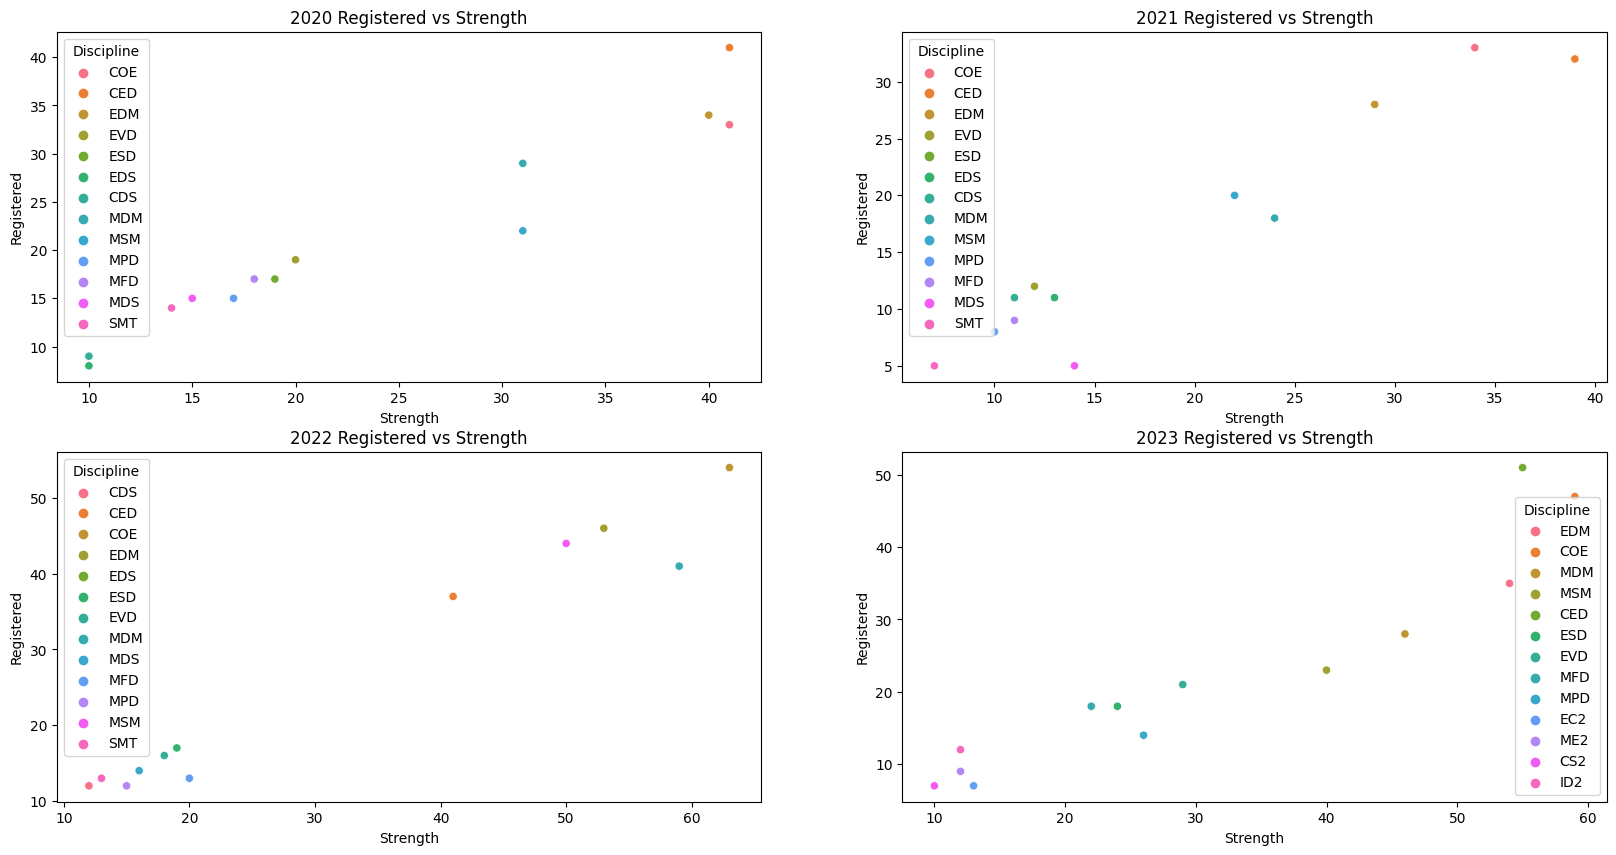

In [223]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.scatterplot(ax = axes[0, 0], data = df_2020_summary.iloc[:13, :], x = "Strength", y = "Registered", hue = "Discipline")
axes[0, 0].set_title("2020 Registered vs Strength")

sns.scatterplot(ax = axes[0, 1], data = df_2021_pl_reg, x = "Strength", y = "Registered", hue = "Discipline")
axes[0, 1].set_title("2021 Registered vs Strength")

sns.scatterplot(ax = axes[1, 0], data = df_2022_summary.iloc[:13, :], x = "Strength", y = "Registered", hue = "Discipline")
axes[1, 0].set_title("2022 Registered vs Strength")

sns.scatterplot(ax = axes[1, 1], data = df_2023_summary.iloc[:13, :], x = "Strength", y = "Registered", hue = "Discipline")
axes[1, 1].set_title("2023 Registered vs Strength")

plt.show()

In [224]:
model = LinearRegression()

In [225]:
def error(Y_test, Y_pred):
    print("MAE = ", metrics.mean_absolute_error(Y_test, Y_pred) )
    print("MSE = ", metrics.mean_squared_error(Y_test, Y_pred))
    print("RMSE = ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

In [226]:
X = pd.DataFrame(pd.concat([df_2020_summary['Strength'][:13], df_2021_pl_reg['Strength'], 
               df_2022_summary['Strength'][:13], df_2023_summary['Strength'][:13]], ignore_index = True))

y = pd.concat([df_2020_summary['Registered'][:13], df_2021_pl_reg['Registered'], 
               df_2022_summary['Registered'][:13], df_2023_summary['Registered'][:13]], ignore_index = True)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[0.79265306]
0.42431064854760336


In [228]:
y_pred = model.predict(X_train)

In [229]:
error(y_train, y_pred)

MAE =  2.7281166480776116
MSE =  13.01833252444636
RMSE =  3.608092643550933


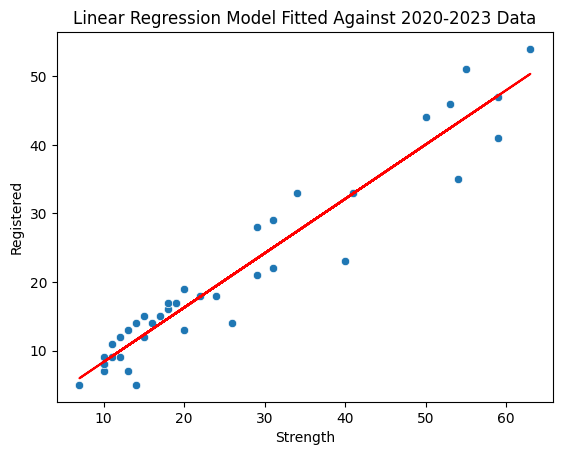

In [230]:
sns.scatterplot(x = X_train.Strength, y = y_train)
plt.plot(X_train, y_pred, color = 'red')
plt.title("Linear Regression Model Fitted Against 2020-2023 Data")
plt.show()

In [231]:
y_test_pred = model.predict(X_test)

In [232]:
error(y_test, y_test_pred)

MAE =  3.075216070868304
MSE =  16.834045270724115
RMSE =  4.102931302218466


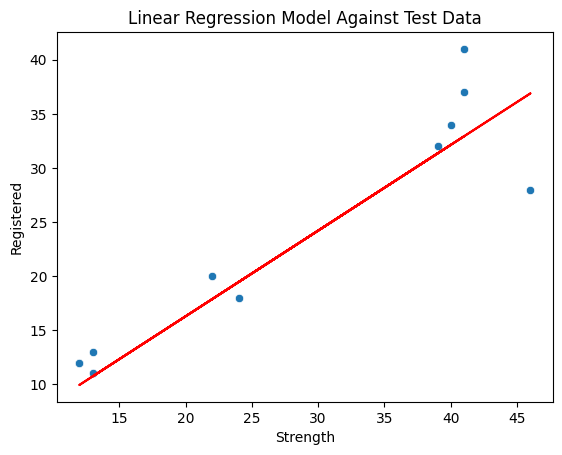

In [233]:
sns.scatterplot(x = X_test.Strength, y = y_test)
plt.plot(X_test, y_test_pred, color = 'red')
plt.title("Linear Regression Model Against Test Data")
plt.show()

-----------------

-------------

### Predicting Number of Students Placed Using Random Forest Regression

In [234]:
# Discipline, Strength, Registered, Branch, Number of Offers, Degree
features = ['Discipline', 'Strength', 'Registered', 'Branch', 'Number of Offers', 'Degree']

model = RandomForestRegressor()

In [235]:
X = pd.DataFrame(pd.concat([df_2020_summary[features][:13],  
                            df_2022_summary[features][:13], 
                            df_2023_summary[features][:13]], ignore_index = True))

y = pd.concat([df_2020_summary['Placed Students'][:13], df_2022_summary['No of Students Placed'][:13], 
               df_2023_summary['No of Students placed'][:13]], ignore_index = True)

In [236]:
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), features)],
    remainder='passthrough'  # Pass through any non-categorical columns
)

# Fit and transform the data
X_encoded = column_transformer.fit_transform(X)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

In [238]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [239]:
y_preds = model.predict(X_test)

In [240]:
error(y_preds, y_test)

MAE =  1.36125
MSE =  2.8898124999999997
RMSE =  1.6999448520466773


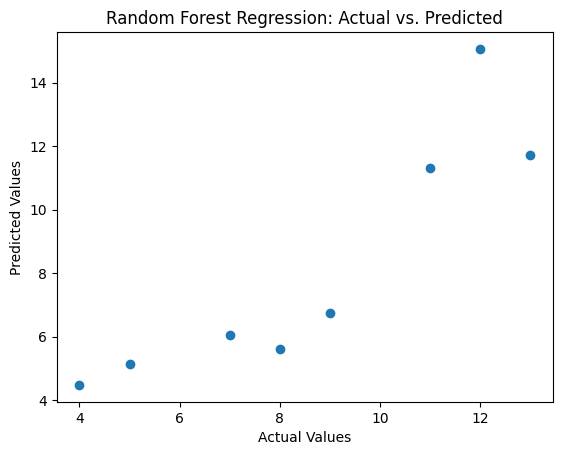

In [241]:
plt.scatter(y_test, y_preds)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs. Predicted")
plt.show()

-----------------

---------------

---------------------

# Inferences